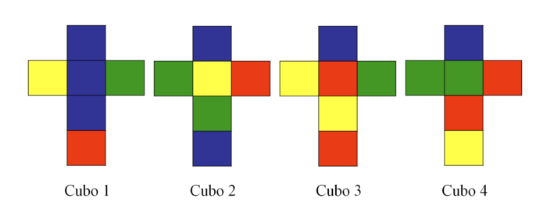

In [163]:
# cubo_1 = [('R', 'A'),('V','V'),('A','V')]
# cubo_2 = [('R', 'A'),('A', 'V'),('R', 'AM')]
# cubo_3 = [('AM', 'A'),('AM','AM'),('R','A')]
# cubo_4 = [('V','V'),('V','R'),('R','A')]
# cubos = [cubo_1,cubo_2,cubo_3,cubo_4]

cubo_1 = [('AM', 'V'),('V','R'),('A','AM')]
cubo_2 = [('V', 'A'),('V', 'V'),('V', 'A')]
cubo_3 = [('AM', 'R'),('V','V'),('V','A')]
cubo_4 = [('AM','A'),('V','A'),('R','R')]
cubos = [cubo_1,cubo_2,cubo_3,cubo_4]

def crea_grafo_cubos(cubos):
    G = Graph(loops=True, multiedges=True)
    for i, edges_ci in enumerate(cubos):
        G.add_edges(map(lambda x: tuple(list(x) + [str(i+1)]) , edges_ci))
    
    return G

In [164]:
Gcubos = crea_grafo_cubos(cubos)

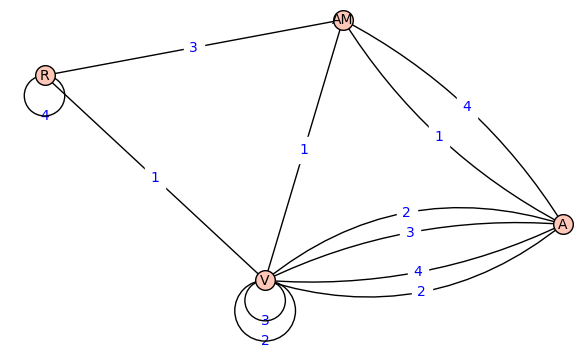

In [165]:
plot(Gcubos, edge_labels=True)

In [166]:
def all_cycles(graph):
    G = Graph(graph)    
    cycleList =[]
    for e in G.edges(labels=True):
        G.delete_edge(e)
        if e[0] == e[1] :
            cycleList.append([e])
        else:
            for path in G.all_paths(e[1], e[0], use_multiedges=True, report_edges=True, labels = True):
                cycleList.append([e] + list(path))
    return cycleList

In [167]:
ciclos = all_cycles(Gcubos)

In [168]:
subgrafos_buenos = list(filter(lambda x: len(x)==4 and  set(map(lambda y: y[2], x))=={'1','2','3','4'}, ciclos))
subgrafos_pendientes = list(filter(lambda x: len(x)<4, ciclos))

print(subgrafos_buenos)

[[('A', 'AM', '4'), ('AM', 'R', '3'), ('R', 'V', '1'), ('A', 'V', '2')], [('A', 'AM', '4'), ('AM', 'R', '3'), ('R', 'V', '1'), ('A', 'V', '2')]]


In [169]:
subgrafos_pendientes 

[[('A', 'AM', '1'), ('AM', 'V', '1'), ('A', 'V', '2')],
 [('A', 'AM', '1'), ('AM', 'V', '1'), ('A', 'V', '2')],
 [('A', 'AM', '1'), ('AM', 'V', '1'), ('A', 'V', '3')],
 [('A', 'AM', '1'), ('AM', 'V', '1'), ('A', 'V', '4')],
 [('A', 'AM', '1'), ('A', 'AM', '4')],
 [('A', 'AM', '4'), ('AM', 'V', '1'), ('A', 'V', '2')],
 [('A', 'AM', '4'), ('AM', 'V', '1'), ('A', 'V', '2')],
 [('A', 'AM', '4'), ('AM', 'V', '1'), ('A', 'V', '3')],
 [('A', 'AM', '4'), ('AM', 'V', '1'), ('A', 'V', '4')],
 [('A', 'V', '2'), ('A', 'V', '2')],
 [('A', 'V', '2'), ('A', 'V', '3')],
 [('A', 'V', '2'), ('A', 'V', '4')],
 [('A', 'V', '2'), ('A', 'V', '3')],
 [('A', 'V', '2'), ('A', 'V', '4')],
 [('A', 'V', '3'), ('A', 'V', '4')],
 [('AM', 'R', '3'), ('R', 'V', '1'), ('AM', 'V', '1')],
 [('R', 'R', '4')],
 [('V', 'V', '2')],
 [('V', 'V', '3')]]

In [170]:
while subgrafos_pendientes:
    actual = subgrafos_pendientes.pop(0)
    if len(actual)==4:
        if set(map(lambda y: y[2], actual))=={'1','2','3','4'}:
            subgrafos_buenos.append(actual)
    else:
        for c in subgrafos_pendientes:
            v_in_c = set(sum(map(lambda x: x[:2], c), ()))
            if (v_in_c.intersection(set(sum(map(lambda y: y[:2], actual), ()))) == set()) and (len(c)+len(actual)) <= 4:
                subgrafos_pendientes.append(actual + c)            

In [171]:
subgrafos_buenos

[[('A', 'AM', '4'), ('AM', 'R', '3'), ('R', 'V', '1'), ('A', 'V', '2')],
 [('A', 'AM', '4'), ('AM', 'R', '3'), ('R', 'V', '1'), ('A', 'V', '2')]]

In [172]:
res = []
while subgrafos_buenos:
    actual = subgrafos_buenos.pop(0)
    res.append(actual)
    subgrafos_buenos = list(filter(lambda c: set(actual).intersection(c) == set(), subgrafos_buenos))

In [173]:
res

[[('A', 'AM', '4'), ('AM', 'R', '3'), ('R', 'V', '1'), ('A', 'V', '2')]]